In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ML tools
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Function to extract elements from 'centroid' list and assign to new columns
def extract_centroid_elements(sheet):
    sheet['L'] = sheet['centroid'].apply(lambda x: eval(x)[0])
    sheet['A'] = sheet['centroid'].apply(lambda x: eval(x)[1])
    sheet['B'] = sheet['centroid'].apply(lambda x: eval(x)[2])
    sheet['C'] = sheet['centroid'].apply(lambda x: eval(x)[3])
    sheet['H'] = sheet['centroid'].apply(lambda x: eval(x)[4])
    return sheet

In [3]:
excel_data = pd.ExcelFile('Data/kmeans_data.xlsx')

In [4]:
# Load each sheet and extract centroid elements
crom_sheet = excel_data.parse('crom')
crom_sheet = extract_centroid_elements(crom_sheet)
crom_sheet['class'] = 'Crom'

cito_sheet = excel_data.parse('cito')
cito_sheet = extract_centroid_elements(cito_sheet)
cito_sheet['class'] = 'Cito'

glob_sheet = excel_data.parse('glob')
glob_sheet = extract_centroid_elements(glob_sheet)
glob_sheet['class'] = 'Glob'

# Combine the sheets into one DataFrame
combined_df = pd.concat([crom_sheet, cito_sheet, glob_sheet], ignore_index=True)

combined_df.head(5)

,image,centroid,sigma,sigma2,min,max,L,A,B,C,H,class
0,000_seg_000,"[59.980328, 28.365368, -34.54461, 28.914858, -...","[4.934159, 4.0793715, 5.5044274, 3.8425076, 5....","[9.868318, 8.158743, 11.008855, 7.685015, 10.7...","[49.495476, 17.636425, -48.236485, 18.648981, ...","[71.74944, 38.006695, -22.794289, 38.006702, -...",59.980328,28.365368,-34.544610,28.914858,-35.028320,Crom
1,000_seg_002,"[62.55246, 33.00717, -40.90761, 33.228, -40.78...","[5.7512674, 4.97069, 8.155145, 4.97069, 8.155145]","[11.502535, 9.94138, 16.31029, 9.94138, 16.31029]","[52.918896, 22.912691, -55.12853, 22.912687, -...","[74.518875, 41.787266, -26.013348, 41.787266, ...",62.552460,33.007170,-40.907610,33.228000,-40.786068,Crom
2,000_seg_003,"[64.59585, 32.087025, -39.434174, 33.17113, -4...","[6.8707, 6.1165853, 8.804792, 5.9006453, 8.444...","[13.7414, 12.2331705, 17.609585, 11.8012905, 1...","[47.451145, 21.071775, -68.12405, 21.581589, -...","[78.43772, 48.551487, -25.866201, 48.551487, -...",64.595850,32.087025,-39.434174,33.171130,-40.807575,Crom
3,000_seg_013,"[63.001766, 32.220894, -36.768433, 32.855927, ...","[5.193889, 5.8503695, 6.862579, 5.62388, 6.518...","[10.387778, 11.700739, 13.725158, 11.24776, 13...","[51.223866, 18.851778, -51.41847, 18.851774, -...","[76.434616, 44.80297, -23.124916, 44.80296, -2...",63.001766,32.220894,-36.768433,32.855927,-37.561222,Crom
4,003_seg_006,"[64.7179, 18.926125, -30.13424, 19.892479, -31...","[6.1342907, 4.834592, 7.1726704, 4.8891087, 7....","[12.268581, 9.669184, 14.345341, 9.778217, 14....","[51.416153, 9.446299, -47.526836, 9.807524, -4...","[76.22819, 31.127144, -17.162367, 31.127144, -...",64.717900,18.926125,-30.134240,19.892479,-31.518284,Crom


<Axes: xlabel='L', ylabel='A'>

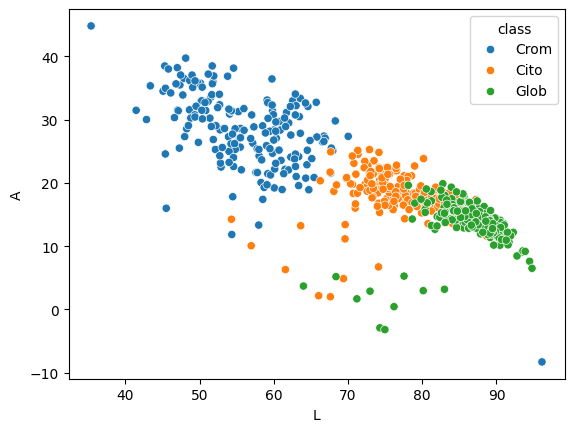

In [5]:
sns.scatterplot(x='L',y='A',data=combined_df,hue='class')

In [6]:
# Usamos para el entrenamiento
features = ['L', 'A','B','C','H']
X = combined_df[features]
y = combined_df['class']

In [7]:
# Veamos las correlaciones
X.corr()

,L,A,B,C,H
L,1.000000,-0.803772,0.943626,-0.783905,0.888753
A,-0.803772,1.000000,-0.822174,0.854194,-0.793287
B,0.943626,-0.822174,1.000000,-0.821819,0.948825
C,-0.783905,0.854194,-0.821819,1.000000,-0.743713
H,0.888753,-0.793287,0.948825,-0.743713,1.000000


In [8]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Perform PCA to reduce to the first 4 principal components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

In [10]:
# Create a DataFrame with PCA components and the class labels
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df['class'] = y.values

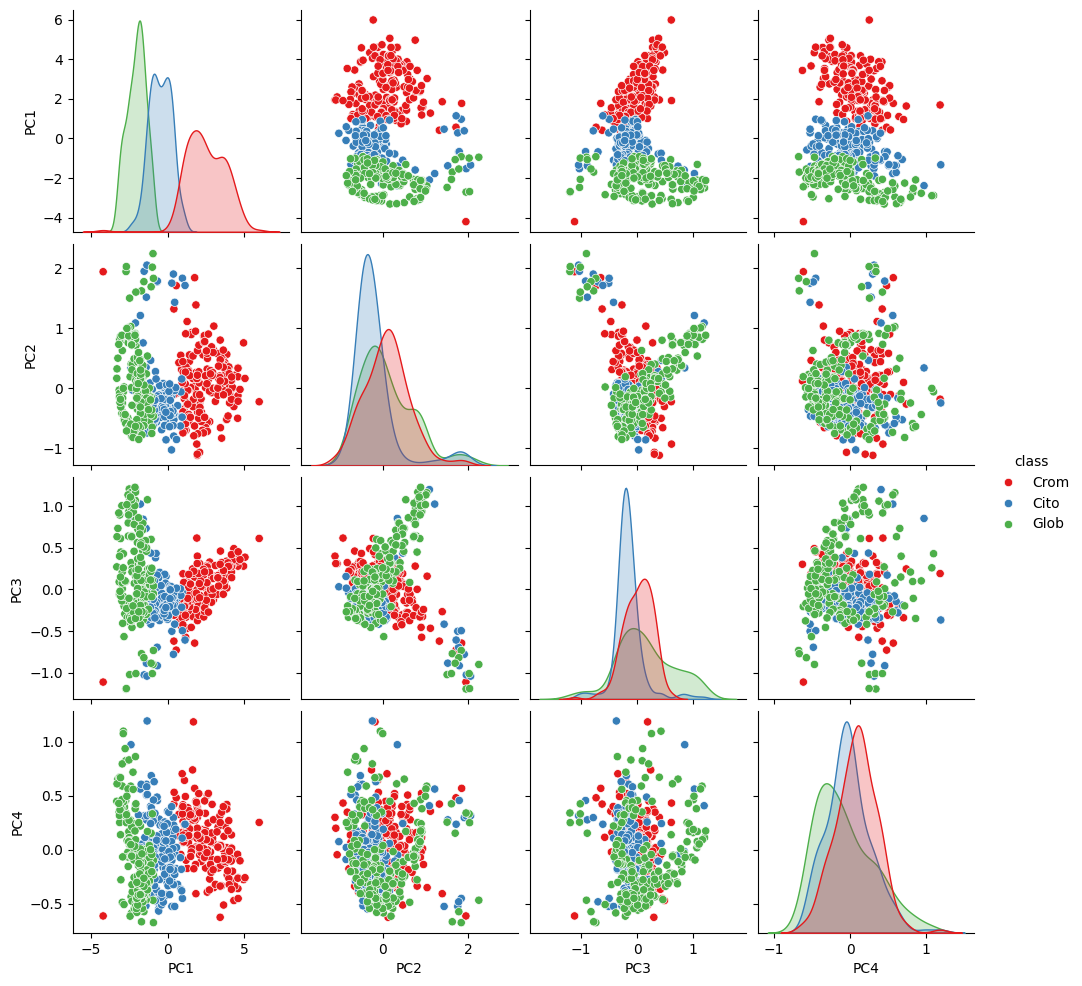

In [11]:
sns.pairplot(pca_df,hue='class', palette='Set1', diag_kind='kde')

In [12]:
# Split the PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [14]:
# Create and train the Support Vector Machine model on PCA-transformed data
svm_model_pca = svm.SVC(kernel='rbf') # Kernel polinomial
#svm_model_pca = svm.SVC(kernel='linear')
svm_model_pca.fit(X_train_pca, y_train)

SVC()

In [15]:
# Make predictions
y_pred_pca = svm_model_pca.predict(X_test_pca)
#y_pred_pca

In [16]:
# Generate a classification report
report_scaled = classification_report(y_test, y_pred_pca, output_dict=True)
pd.DataFrame(report_scaled).transpose()

,precision,recall,f1-score,support
Cito,0.960784,0.907407,0.933333,54.000000
Crom,1.000000,1.000000,1.000000,59.000000
Glob,0.910714,0.962264,0.935780,53.000000
accuracy,0.957831,0.957831,0.957831,0.957831
macro avg,0.957166,0.956557,0.956371,166.000000
weighted avg,0.958736,0.957831,0.957809,166.000000


In [17]:
# Generate the confusion matrix
conf_matrix_scaled = confusion_matrix(y_test, y_pred_pca, labels=['Crom', 'Cito', 'Glob'])
conf_matrix_scaled

array([[59,  0,  0],
       [ 0, 49,  5],
       [ 0,  2, 51]])

Text(0.5, 1.0, 'Confusion Matrix (Standardized)')

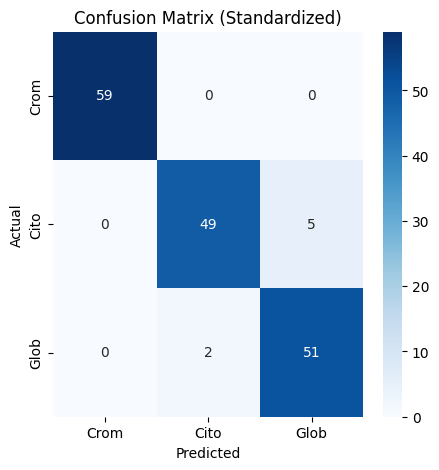

In [18]:
# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_scaled, annot=True, fmt='d', cmap='Blues', xticklabels=['Crom', 'Cito', 'Glob'], yticklabels=['Crom', 'Cito', 'Glob'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Standardized)')

In [19]:
def Predictor(data):
    
    data = np.array([data])
    # Estandarizamos
    data_scaled = scaler.transform(data)
    #print(data_scaled)
    data_pca = pca.transform(data_scaled)
    
    prediction = svm_model_pca.predict(data_pca)
    
    return prediction[0]

In [21]:
Predictor(X.iloc[10])

/home/alejandro/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Crom'